In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device("mps" if torch.backends.mps.is_available() else 'cpu')

In [21]:
input_size = 28 * 28
hidden_size = 100
n_classes = 10
n_epochs = 50
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


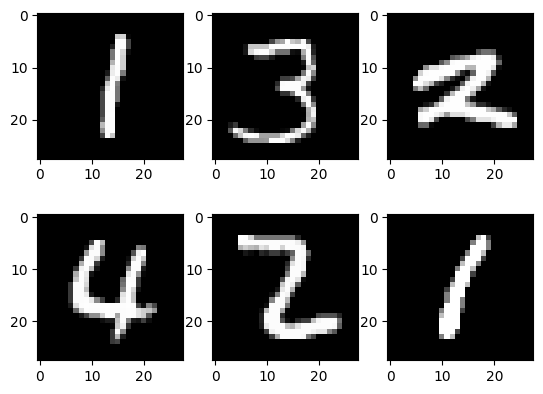

In [22]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

In [24]:
model = NeuralNet(input_size, hidden_size, n_classes)
model.to("mps")

criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
losses = []
for epoch in range(n_epochs):
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass and zero gradients
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        running_loss += loss

    if (epoch + 1) % 5 == 0:
        print(f"Epoch -  {epoch + 1}/{n_epochs} | Loss {running_loss}")

    losses.append(running_loss.item())

Epoch -  5/50 | Loss 945.9786376953125
Epoch -  10/50 | Loss 526.6578369140625
Epoch -  15/50 | Loss 383.4739685058594
Epoch -  20/50 | Loss 321.146484375
Epoch -  25/50 | Loss 286.130859375
Epoch -  30/50 | Loss 263.4883117675781
Epoch -  35/50 | Loss 247.5356903076172
Epoch -  40/50 | Loss 235.59788513183594
Epoch -  45/50 | Loss 226.2530059814453
Epoch -  50/50 | Loss 218.6537322998047


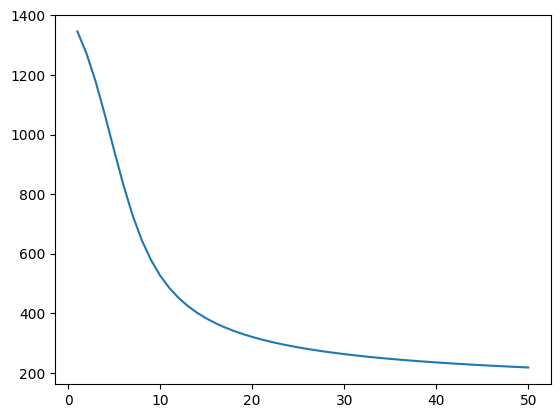

In [25]:
import numpy as np

plt.plot(
    np.arange(1, n_epochs + 1),
    losses
)

In [26]:
predictions = []

n_correct, n_samples = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        # break
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
        
acc = 100 * n_correct / n_samples

In [27]:
acc

0.9